### Assignment 1: Modupe Agnes O'Tayo

In [1]:
# import necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

 ### Brief overview of the dataset.


> The dataset is about Air Quality and Water Quality of selected countries of the world. It has 3963 Rows and 5 Columns namely:
> - City
> - Region
> - Country
> - Air Quality
> - Water Pollution
> Water Pollution and Air Quality are Continuous variable with value ranging from 0 to 100. 0 Water pollution  means no pollution while 100 means there is no pollution. Reverse is the case for Air Quality.

In [2]:
#data loading
data = pd.read_csv("cities_air_quality_water_pollution.csv")
data.head()

,City,"""Region""","""Country""","""AirQuality""","""WaterPollution"""
0,New York City,"""New York""","""United States of America""",46.816038,49.504950
1,"Washington, D.C.","""District of Columbia""","""United States of America""",66.129032,49.107143
2,San Francisco,"""California""","""United States of America""",60.514019,43.000000
3,Berlin,"""""","""Germany""",62.364130,28.612717
4,Los Angeles,"""California""","""United States of America""",36.621622,61.299435


In [3]:
# Identify number of Rows and Columns in the dataset
data.shape
print(f"The dataset has:\nRows: {data.shape[0]}\nColumns: {data.shape[1]}")

The dataset has:
Rows: 3963
Columns: 5


### Data Cleaning and Exploration

In [4]:
# General information about the columns and datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               3963 non-null   object 
 1    "Region"          3963 non-null   object 
 2    "Country"         3963 non-null   object 
 3    "AirQuality"      3963 non-null   float64
 4    "WaterPollution"  3963 non-null   float64
dtypes: float64(2), object(3)
memory usage: 154.9+ KB


In [5]:
# Showing the basic statistical information of the dataset
data.describe()

,"""AirQuality""","""WaterPollution"""
count,3963.000000,3963.000000
mean,62.253452,44.635372
std,30.944753,25.663910
min,0.000000,0.000000
25%,37.686567,25.000000
50%,69.444444,50.000000
75%,87.500000,57.719393
max,100.000000,100.000000


In [6]:
# To Remove leading/trailing quotes and whitespaces from values
data.columns = data.columns.str.replace('"', '').str.strip()
data = data.applymap(lambda x: x.strip(' "\'') if isinstance(x, str) else x)

In [7]:
data.head(8)

,City,Region,Country,AirQuality,WaterPollution
0,New York City,New York,United States of America,46.816038,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435
5,Bern,Canton of Bern,Switzerland,94.318182,12.500000
6,Geneva,Canton of Geneva,Switzerland,71.538462,17.372881
7,Zurich,Canton of Zurich,Switzerland,83.809524,10.714286


### Data visualization

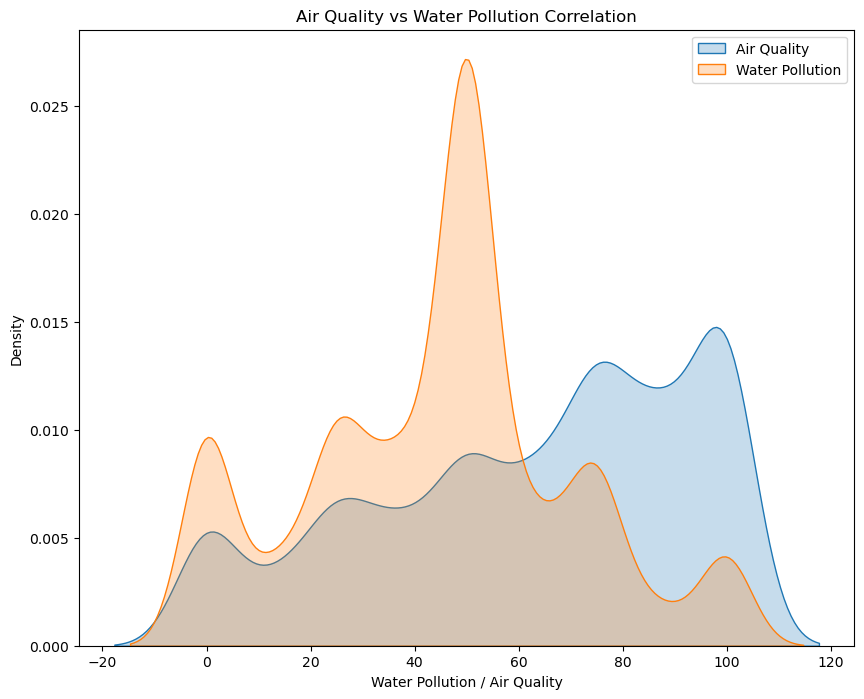

In [8]:
#Correlation between Air quality and Water pollution
plt.figure(figsize=(10, 8))
sns.kdeplot(data=data['AirQuality'],  fill=True, label='Air Quality')
sns.kdeplot(data=data['WaterPollution'],  fill=True, label='Water Pollution')
plt.title("Air Quality vs Water Pollution Correlation")
plt.legend()
plt.xlabel("Water Pollution / Air Quality")
plt.ylabel("Density")
plt.show()

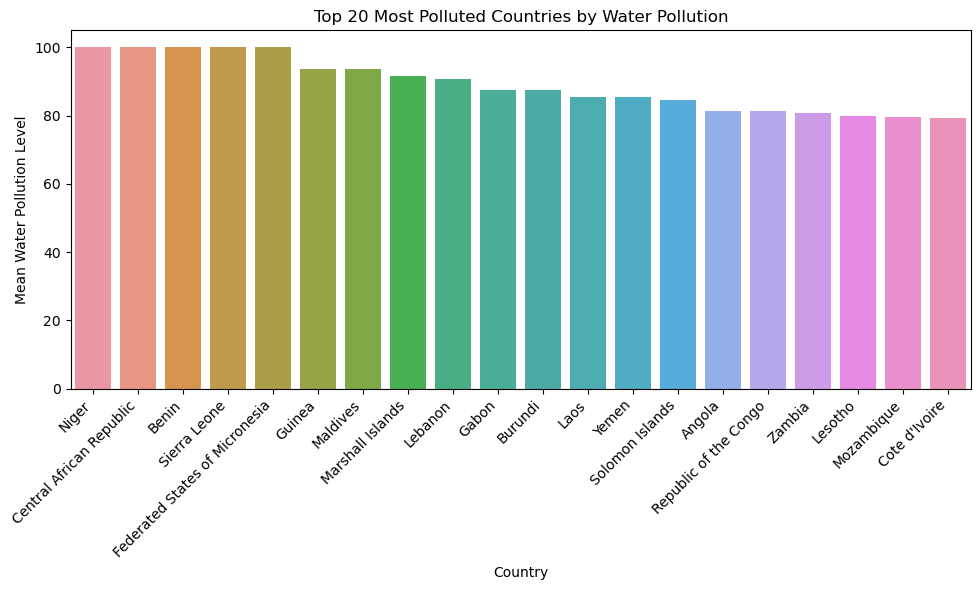

In [13]:
country_water_pollution = data.groupby('Country')['WaterPollution'].mean().reset_index()

# Sort the data by water pollution level in descending order
country_water_pollution_sorted = country_water_pollution.sort_values(by='WaterPollution', ascending=False)

# Plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='WaterPollution', data=country_water_pollution_sorted.head(20))
plt.title('Top 20 Most Polluted Countries by Water Pollution')
plt.xlabel('Country')
plt.ylabel('Mean Water Pollution Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

> African countries lead the chart of countries with high water pollution. A lot of these nations are Agrigarian economies, there are high likelihood of agricultural wastes like pesticides, fertilizers and animal wastes running off into the water bodies. There may also be issues related to sewage and wastewater inadequacy in the region.

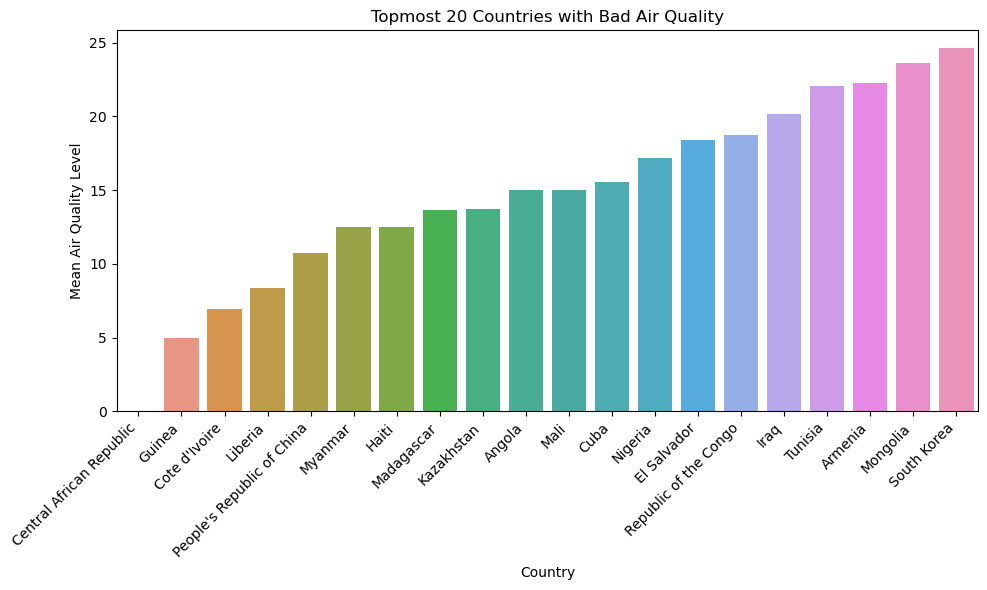

In [14]:
country_air_quality = data.groupby('Country')['AirQuality'].mean().reset_index()

# Sort the data by water pollution level in descending order
country_air_quality_sorted = country_air_quality.sort_values(by='AirQuality', ascending=True)

# Plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='AirQuality', data=country_air_quality_sorted.head(20))
plt.title('Topmost 20 Countries with Bad Air Quality')
plt.xlabel('Country')
plt.ylabel('Mean Air Quality Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

> There seems to be a relationship between population and natural disasters and Air Quality. Even though most countries with bad Air Quality are African countries, China, Haiti and South Korea seems to explain the effect of population and natural disater on the quality of air. Wars also impact on the quality of air as warring nations like Liberia, Iraq and Mali are seen to have bad Air Quality

### Conclusion

> - War, Population, Natural disaster are causative factors for bad air quality
> - Inadequate Sewage and wastewater as well as agricultural runoff accounts for most of the water pollution